<a href="https://colab.research.google.com/github/KondoKoyo/EU_M_Math/blob/main/Chap03_Cm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

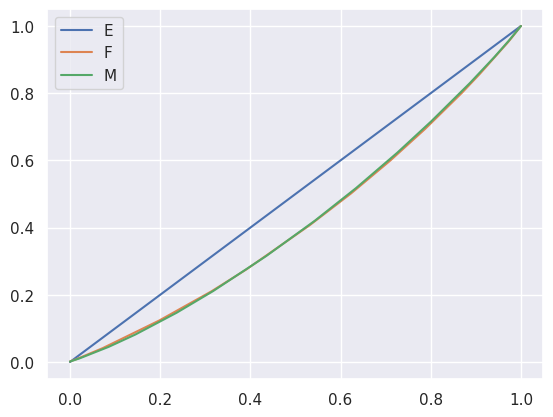

In [4]:
from urllib import request
import numpy as np
import scipy as sp
import pandas as pd
from pandas  import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
%precision 3

import requests, zipfile
from io import StringIO
import io

# from sklearn import  liner_model
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r= requests.get(url,stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

student_data_math = pd.read_csv('student-mat.csv',sep=';')
student_data_math_F = student_data_math[student_data_math.sex=='F']
student_data_math_M = student_data_math[student_data_math.sex=='M']

sorted_data_G1_F = student_data_math_F.G1.sort_values()
sorted_data_G1_M = student_data_math_M.G1.sort_values()

len_F = np.arange(len(sorted_data_G1_F))
len_M = np.arange(len(sorted_data_G1_M))

plt.plot(len_F/len_F.max(), len_F/len_F.max(), label= 'E')
plt.plot(len_F/len_F.max(),sorted_data_G1_F.cumsum()/sorted_data_G1_F.sum(),label='F')
plt.plot(len_M/len_M.max(),sorted_data_G1_M.cumsum()/sorted_data_G1_M.sum(),label='M')
plt.legend()
plt.grid(True)




In [6]:
def heikinsa(data):
  subt = []
  for i in range(0,len(data)-1):
    for j in range(i+1,len(data)):
        subt.append(np.abs(data[i] - data[j]))
  return float(sum(subt))*2 / (len(data)**2)

def gini(heikinsa,data):
  return heikinsa / (2*np.mean(data))

print('男性の数学の成績に関するジニ関数:',gini(heikinsa(np.array(sorted_data_G1_M)),np.array(sorted_data_G1_M)))

print('女性の数学の成績に関するジニ関数:',gini(heikinsa(np.array(sorted_data_G1_F)),np.array(sorted_data_G1_F)))

男性の数学の成績に関するジニ関数: 0.17197351667939903
女性の数学の成績に関するジニ関数: 0.1723782950865341
